In [1]:
# version should be 1.8.8 or higher
import tequila as tq
import numpy
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
import numpy as np

from itertools import product

print(tq.__version__)

1.9.9dev


# Energy vs. Bond Distance

Get the exact and SPA energies for bond distances between 0.5 Angstroms and 4.2 Angstroms.

In [ ]:
exact_energies = []
spa_energies = []
distance = []

for i in range(50, 225, 10):
    
    print(i / 100)
    
    # initialize a molecule with varying bond distance
    geometry = "H 0.0 0.0 0.0\nH 0.0 0.0 " + str(i / 100) + "\nH 0.0 0.0 " + str((i * 2) / 100) + "\nH 0.0 0.0 " + str((i * 3) / 100)
    basis_set = "STO-3G" # one orbital per H-Atom
    mol = tq.Molecule(geometry=geometry, basis_set=basis_set)
    
    # excact energy
    fci = mol.compute_energy("fci")

    # represent with atomic orbitals
    mol = mol.use_native_orbitals()
    
    # Get optimal orbital angles
    U = mol.make_ansatz(name="SPA", edges=[(0,1),(2,3)])
    guess = numpy.asarray([[1.0, 1.0, 0.0, 0.0],
                           [1.0, -1., 0.0, 0.0],
                           [0.0, 0.0, 1.0, 1.0], 
                           [0.0, 0.0, 1.0, -1.]])
    
    opt = tq.chemistry.optimize_orbitals(circuit=U, molecule=mol, initial_guess=guess.T, silent=True)
    
    distance.append(i / 100)
    exact_energies.append(fci)
    spa_energies.append(opt.energy)

0.5
0.6
0.7
0.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
2.1
2.2


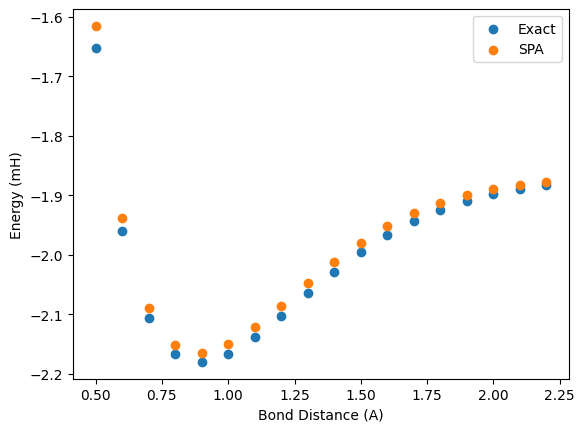

In [5]:
plt.scatter(distance, exact_energies, label="Exact")
plt.scatter(distance, spa_energies, label="SPA")
plt.legend()
plt.xlabel("Bond Distance (A)")
plt.ylabel("Energy (mH)")
plt.show()